# OllamaLLM

:::caution
You are currently on a page documenting the use of Ollama models as [text completion models](/docs/concepts/text_llms). Many popular Ollama models are [chat completion models](/docs/concepts/chat_models).

You may be looking for [this page instead](/docs/integrations/chat/ollama/).
:::

This page goes over how to use LangChain to interact with `Ollama` models.

## Installation

In [ ]:
# install package
%pip install -U langchain-ollama

## Setup

First, follow [these instructions](https://github.com/jmorganca/ollama) to set up and run a local Ollama instance:

* [Download](https://ollama.ai/download) and install Ollama onto the available supported platforms (including Windows Subsystem for Linux)
* Fetch available LLM model via `ollama pull <name-of-model>`
    * View a list of available models via the [model library](https://ollama.ai/library)
    * e.g., `ollama pull llama3`
* This will download the default tagged version of the model. Typically, the default points to the latest, smallest sized-parameter model.

> On Mac, the models will be download to `~/.ollama/models`
> 
> On Linux (or WSL), the models will be stored at `/usr/share/ollama/.ollama/models`

* Specify the exact version of the model of interest as such `ollama pull vicuna:13b-v1.5-16k-q4_0` (View the [various tags for the `Vicuna`](https://ollama.ai/library/vicuna/tags) model in this instance)
* To view all pulled models, use `ollama list`
* To chat directly with a model from the command line, use `ollama run <name-of-model>`
* View the [Ollama documentation](https://github.com/jmorganca/ollama) for more commands. Run `ollama help` in the terminal to see available commands too.

## Usage

In [2]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM

template = """Question: {question}

Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)

model = OllamaLLM(model="llama3.1")

chain = prompt | model

chain.invoke({"question": "What is LangChain?"})

"Sounds like a plan!\n\nTo answer what LangChain is, let's break it down step by step.\n\n**Step 1: Understand the Context**\nLangChain seems to be related to language or programming, possibly in an AI context. This makes me wonder if it's a framework, library, or tool for building models or interacting with them.\n\n**Step 2: Research Possible Definitions**\nAfter some quick searching, I found that LangChain is actually a Python library for building and composing conversational AI models. It seems to provide a way to create modular and reusable components for chatbots, voice assistants, and other conversational interfaces.\n\n**Step 3: Explore Key Features and Use Cases**\nLangChain likely offers features such as:\n\n* Easy composition of conversational flows\n* Support for various input/output formats (e.g., text, audio)\n* Integration with popular AI frameworks and libraries\n\nUse cases might include building chatbots for customer service, creating voice assistants for smart homes,

## Multi-modal

Ollama has support for multi-modal LLMs, such as [bakllava](https://ollama.com/library/bakllava) and [llava](https://ollama.com/library/llava).

    ollama pull bakllava

Be sure to update Ollama so that you have the most recent version to support multi-modal.


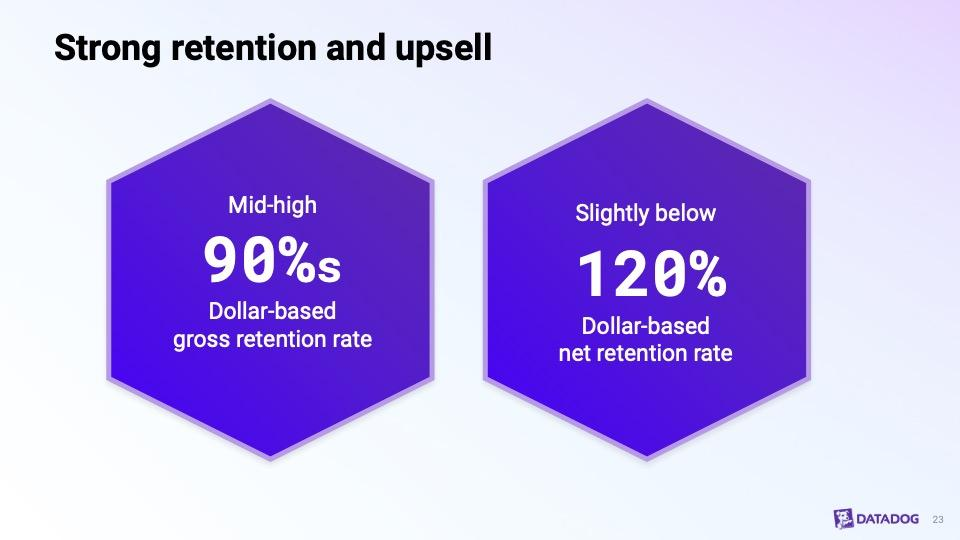

In [2]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "../../../static/img/ollama_example_img.jpg"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [3]:
from langchain_ollama import OllamaLLM

llm = OllamaLLM(model="bakllava")

llm_with_image_context = llm.bind(images=[image_b64])
llm_with_image_context.invoke("What is the dollar based gross retention rate:")

'90%'